In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#For conv layers
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#Lets verify the loaded data
print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [2]:
from tensorflow.keras.layers import Rescaling

## Below code INCREASES OUR PERFORMANCE. Normalizing the dataset
scaler = Rescaling(scale=1.0 / 255)
x_train = scaler(x_train)
print("shape:", x_train.shape)
print("min:", np.min(x_train))
print("max:", np.max(x_train))

shape: (60000, 28, 28, 1)
min: 0.0
max: 1.0


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [5]:
#Convert to one-hot encoding for our test vector
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [6]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [7]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 47s 49ms/step - loss: 0.2272 - accuracy: 0.9312
Epoch 2/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0799 - accuracy: 0.9762
Epoch 3/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0555 - accuracy: 0.9832
Epoch 4/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0467 - accuracy: 0.9856
Epoch 5/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0391 - accuracy: 0.9887
Epoch 6/10
938/938 [==============================] - 47s 50ms/step - loss: 0.0347 - accuracy: 0.9893
Epoch 7/10
938/938 [==============================] - 47s 50ms/step - loss: 0.0310 - accuracy: 0.9904
Epoch 8/10
938/938 [==============================] - 47s 51ms/step - loss: 0.0262 - accuracy: 0.9921
Epoch 9/10
938/938 [==============================] - 48s 51ms/step - loss: 0.0217 - accuracy: 0.9932
Epoch 10/10
938/938 [==============================] - 48s 51ms/step - loss: 0.020

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 5.2140 - accuracy: 0.9925


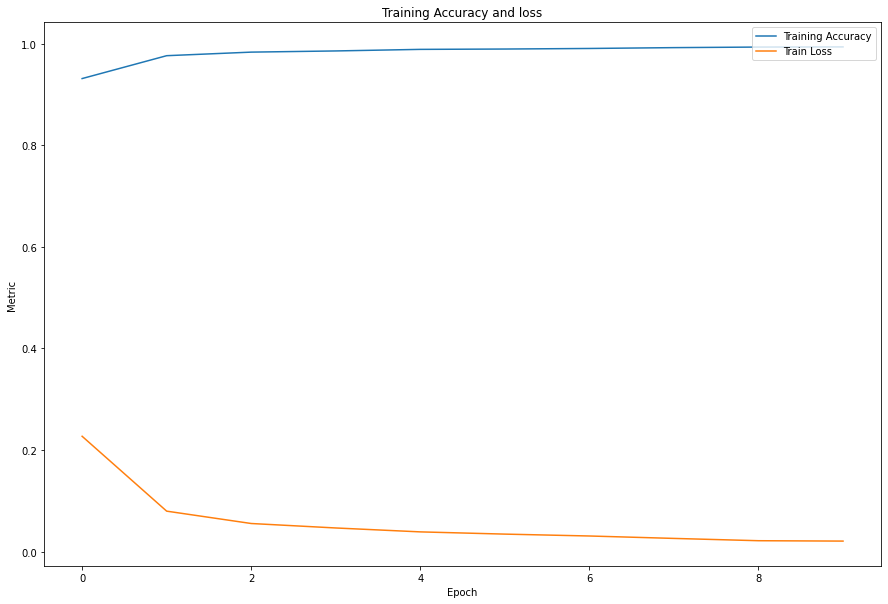

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Training Accuracy and loss')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Train Loss'], loc='upper right')
plt.show()


In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
flatten_size = 28 * 28 
x_train = x_train.reshape(x_train.shape[0], flatten_size)
x_test = x_test.reshape(x_test.shape[0], flatten_size)

x_train = x_train.astype('float32') #Convert Uint8 values 0-255 to float
x_test = x_test.astype('float32')
x_train /= 255                      #To normalize the values from 0-255 to 0-1
x_test /= 255
#Lets verify the loaded data

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


New Model with Just dense layers

New model with just dense layers. NO CONVOLUTION
USING Different layer and different Optimizer for Hyperparameter tuning(SGD)

In [22]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD

# Creating the model.
# New model with just dense layers. NO CONVOLUTION
#USING Different layer and different Optimizer for Hyperparameter tuning

model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(10, activation='softmax'))  # Output layer.

model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])


# Training the model.
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test), epochs=10, batch_size=64)

# Evaluating the model
loss, accuracy = model.evaluate(x_test, y_test)

print(model.summary())
print('\n\n Loss', loss, 'Accuracy:', accuracy)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 2.8178 - accuracy: 0.7785 - val_loss: 2.2137 - val_accuracy: 0.8807
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 1.9912 - accuracy: 0.8844 - val_loss: 1.7590 - val_accuracy: 0.8986
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 1.6000 - accuracy: 0.8963 - val_loss: 1.4202 - val_accuracy: 0.9073
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 1.2963 - accuracy: 0.9011 - val_loss: 1.1500 - val_accuracy: 0.9109
Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 1.0575 - accuracy: 0.9057 - val_loss: 0.9418 - val_accuracy: 0.9107
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.8751 - accuracy: 0.9064 - val_loss: 0.7868 - val_accuracy: 0.9127
Epoch 7/10
938/938 [==============================] - 2s 3ms/step - loss: 0.7429 - accuracy: 0.9076 - val_loss: 0.6775 - val_accuracy: 0.9125
Epoch 

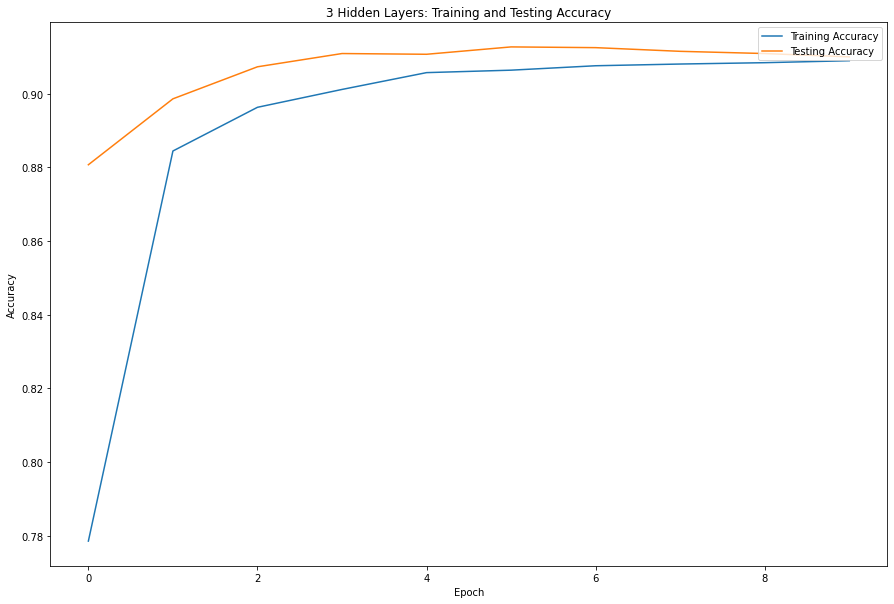

In [23]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('3 Hidden Layers: Training and Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()

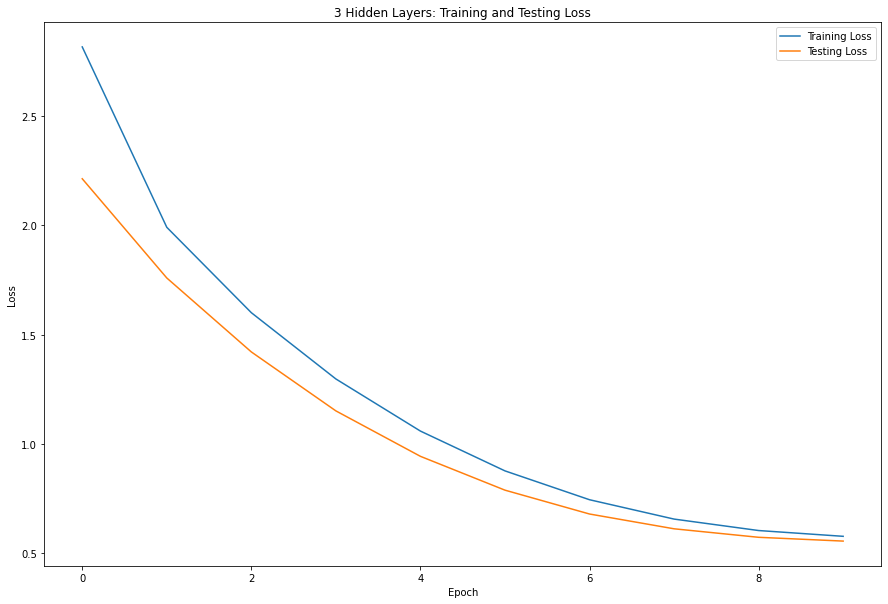

In [24]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('3 Hidden Layers: Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()

New Model #3 for Hyperparameter Tuning.

In [27]:

model3 = Sequential()
model3.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model3.add(Dense(10, activation='softmax'))  # Output layer.

model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


# Training the model.
history = model3.fit(x_train, y_train,
                    validation_data=(x_test, y_test), epochs=10, batch_size=64)

# Evaluating the model
loss, accuracy = model3.evaluate(x_test, y_test)

print(model3.summary())
print('\n\n Loss', loss, 'Accuracy:', accuracy)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.9049 - accuracy: 0.8824 - val_loss: 0.6286 - val_accuracy: 0.9104
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5814 - accuracy: 0.9120 - val_loss: 0.5357 - val_accuracy: 0.9156
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5105 - accuracy: 0.9244 - val_loss: 0.4917 - val_accuracy: 0.9231
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4695 - accuracy: 0.9311 - val_loss: 0.4567 - val_accuracy: 0.9327
Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 0.4409 - accuracy: 0.9355 - val_loss: 0.4334 - val_accuracy: 0.9395
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.4197 - accuracy: 0.9387 - val_loss: 0.3945 - val_accuracy: 0.9379
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4026 - accuracy: 0.9426 - val_loss: 0.3919 - val_accuracy: 0.9427
Epoch 

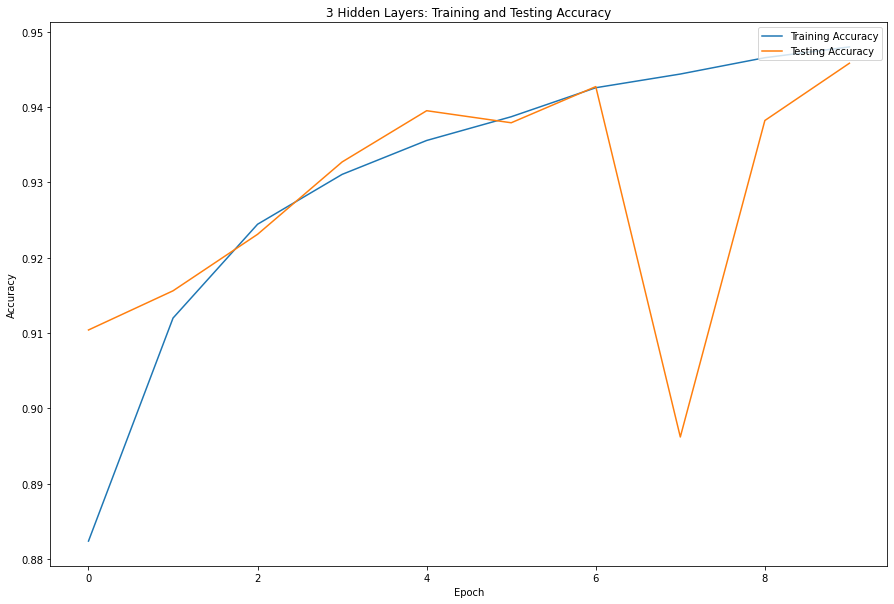

In [28]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('3 Hidden Layers: Training and Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()